In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
df=pd.read_csv('hamspam.tsv',sep='\t')
df.columns=['label','msg']

In [5]:
df.head()

,label,msg
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


In [7]:
h_v=[]
for i in df.label:
    if i=='ham':
        h_v.append(0)
    else:
        h_v.append(1)

In [8]:
df['ham_values']=h_v

In [9]:
df.head()

,label,msg,ham_values
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
1,ham,"Nah I don't think he goes to usf, he lives aro...",0
2,ham,Even my brother is not like to speak with me. ...,0
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,0
4,ham,As per your request 'Melle Melle (Oru Minnamin...,0


In [137]:
# df['ham_values2']=df.ham_values.apply(lambda x: 0 if df.ham=='ham' else 1)

In [10]:
df.ham_values.unique()

array([1, 0], dtype=int64)

In [11]:
df[df.ham_values==1].count()

label         746
msg           746
ham_values    746
dtype: int64

In [12]:
len(df.ham_values==1)

5567

In [13]:
len(df.ham_values==0)

5567

In [14]:
len(df[df.ham_values==1])

746

In [143]:
len(df[df.ham_values==0])

4821

In [15]:
df.columns=['label','msg','ham_values']

In [16]:
df.head()

,label,msg,ham_values
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
1,ham,"Nah I don't think he goes to usf, he lives aro...",0
2,ham,Even my brother is not like to speak with me. ...,0
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,0
4,ham,As per your request 'Melle Melle (Oru Minnamin...,0


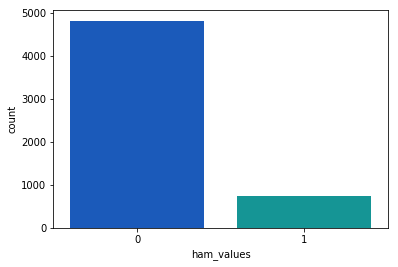

In [17]:
import seaborn as sns
sns.countplot('ham_values', data=df, palette="winter")
# plt.title('Class Distributions \n 0: No Disease || 1: Disease', fontsize=14)

<BarContainer object of 2 artists>

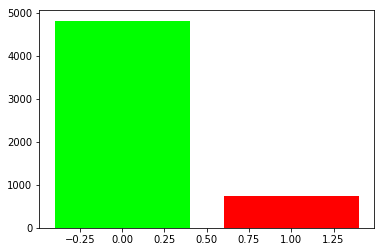

In [18]:
counts=df.ham_values.value_counts()
plt.bar(counts.index,counts.get_values(),color=['lime','red'])

In [148]:
counts

0    4821
1     746
Name: ham_values, dtype: int64

In [19]:
x=df['msg']
y=df.ham_values

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
count_vectorizer=CountVectorizer(stop_words='english')

In [23]:
count_train=count_vectorizer.fit_transform(x_train)

In [24]:
# count_vectorizer.get_feature_names()

In [25]:
count_vectorizer.transform()

TypeError: transform() missing 1 required positional argument: 'raw_documents'

In [26]:
# count_vectorizer.fit(['hello i am sheeba', 'i am groot', 'you are groot'])
# count_vectorizer.get_feature_names()
# count_vectorizer.transform(['hello i am sheeba']).toarray()
# count_train.toarray().shape

In [27]:
len(x_train)==len(y_train)

True

In [28]:
df.head()

,label,msg,ham_values
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
1,ham,"Nah I don't think he goes to usf, he lives aro...",0
2,ham,Even my brother is not like to speak with me. ...,0
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,0
4,ham,As per your request 'Melle Melle (Oru Minnamin...,0


In [29]:
# count_vectorizer.get_feature_names()

In [30]:
count_train

<4453x7436 sparse matrix of type '<class 'numpy.int64'>'
	with 35022 stored elements in Compressed Sparse Row format>

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import itertools

In [32]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    from sklearn.metrics import confusion_matrix
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

accuracy: 0.985
Confusion matrix, without normalization
[[956   9]
 [  8 141]]


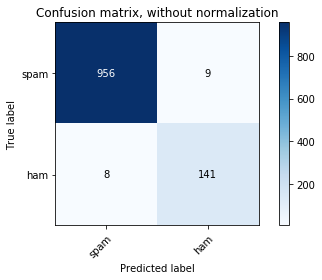

In [33]:
clf=MultinomialNB(alpha=0.5)
clf.fit(count_train.toarray(),y_train)
count_test=count_vectorizer.transform(x_test)
pred=clf.predict(count_test)
score=metrics.accuracy_score(y_test,pred)
print('accuracy: %0.3f' %score)
cm=metrics.confusion_matrix(y_test,pred,labels=[0,1])
plot_confusion_matrix(y_test,pred,classes=['spam','ham'])

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtree=DecisionTreeClassifier()

In [36]:
dtree.fit(count_train.toarray(),y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [208]:
pred=dtree.predict(count_test.toarray())

In [209]:
accuracy_score(pred,y_test)

0.9775583482944344

## |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [37]:
import numpy as np
import pandas as np
import matplotlib.pyplot as plt

In [38]:
df=pd.read_csv('hamspam.tsv', sep='\t')

In [39]:
df.head()

,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


In [40]:
df.columns=['label','msg']

In [41]:
df.head()

,label,msg
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


<BarContainer object of 2 artists>

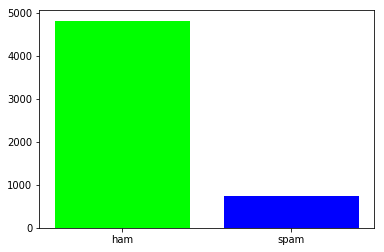

In [42]:
counts=df.label.value_counts()
plt.bar(counts.index,counts.get_values(),color=['lime','blue'])

In [43]:
df.describe()

,label,msg
count,5567,5567
unique,2,5164
top,ham,"Sorry, I'll call later"
freq,4821,30


In [229]:
df.shape

(5567, 2)

In [231]:
df.columns

Index(['label', 'msg'], dtype='object')

In [232]:
df['boolean_label']=df.label.apply(lambda x: 1 if x=='ham' else 0)

In [233]:
df.head()

,label,msg,boolean_label
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
1,ham,"Nah I don't think he goes to usf, he lives aro...",1
2,ham,Even my brother is not like to speak with me. ...,1
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,1


In [234]:
df['label'].describe()

count     5567
unique       2
top        ham
freq      4821
Name: label, dtype: object

In [235]:
from sklearn.model_selection import train_test_split
data=df.copy()

In [260]:
y=df.boolean_label.values

In [261]:
y

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [262]:
x=df.msg.values

In [263]:
x

array(["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       "Nah I don't think he goes to usf, he lives around here though",
       'Even my brother is not like to speak with me. They treat me like aids patent.',
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [264]:
df.columns

Index(['label', 'msg', 'boolean_label'], dtype='object')

In [265]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=53)

In [266]:
len(x_train)==len(y_train)

True

In [267]:
from sklearn.feature_extraction.text import CountVectorizer

In [268]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train=count_vectorizer.fit_transform(x_train)

In [269]:
count_vectorizer.get_feature_names()

['00',
 '000',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808247860',
 '07815296484',
 '07821230901',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 

In [270]:
len(count_vectorizer.get_feature_names())

7540

In [271]:
count_train.shape

(4453, 7540)

In [272]:
#function Copied from Scikit Learn Confusion matrix Web Link
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.982
Confusion matrix, without normalization


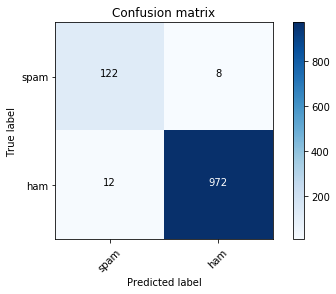

In [273]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools
clf = MultinomialNB(alpha=0.5)
clf.fit(count_train.toarray(), y_train)
count_test=count_vectorizer.transform(x_test)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=['spam', 'ham'])